In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualize distributions

1. see all stat distributions
  - box plots, histograms for original, log, norm
2. save plots for each stat
3. add more subplots
  - final version is box and hist for each dist (see below)
4. save plots again, and do some more e.g. violin 
5. decide on transformations... clipping, log

In [2]:
df = pd.read_csv('data/clean_data.csv', index_col=0)
df.head()

%3PA  %3PM  %AST  %BLK  %BLKA  %DREB  %FGA  %FGA 2PT  \
A.C. Green 1996      2.6   0.4   6.8   8.4   15.5   29.9  11.8      95.9   
Aaron McKie 1996    16.6  19.6  25.2  12.4   22.6   17.7  14.4      71.8   
Adam Keefe 1996      0.5   0.0   6.7  16.9   16.5   24.4  11.3      99.4   
Allan Houston 1996  44.7  45.0  14.6   6.7   19.6   11.6  24.5      62.8   
Allen Iverson 1996  42.8  45.7  42.2   7.6   26.5   11.0  27.9      69.7   

                    %FGA 3PT  %FGM  ...   PTS   REB  REB%  STL  TO RATIO  \
A.C. Green 1996          4.1  13.3  ...  12.7  14.0  13.5  1.5      10.3   
Aaron McKie 1996        28.2  13.2  ...  14.0   7.2   7.1  2.5      13.5   
Adam Keefe 1996          0.6  11.6  ...  13.3  12.2  12.9  1.7      15.9   
Allan Houston 1996      37.2  22.3  ...  23.2   4.6   4.8  0.8      11.4   
Allen Iverson 1996      30.3  26.1  ...  28.5   5.0   4.9  2.5      12.7   

                    TOT MIN  TOV   TS%  USG%        MPG  
A.C. Green 1996      2494.0  1.6  52.3  11.8  30.048193  
Aaron McKie 1996     1624.0  2.9  52.4  14.2  19.566265  
Adam Keefe 1996       917.0  2.5  57.2  12.4  14.790323  
Allan Houston 1996   2681.0  3.2  53.1  21.8  33.098765  
Allen Iverson 1996   3041.0  5.4  51.3  28.1  40.013158  

[5 rows x 66 columns]

## Comparing original, normalized, and log transformed distributions (old)

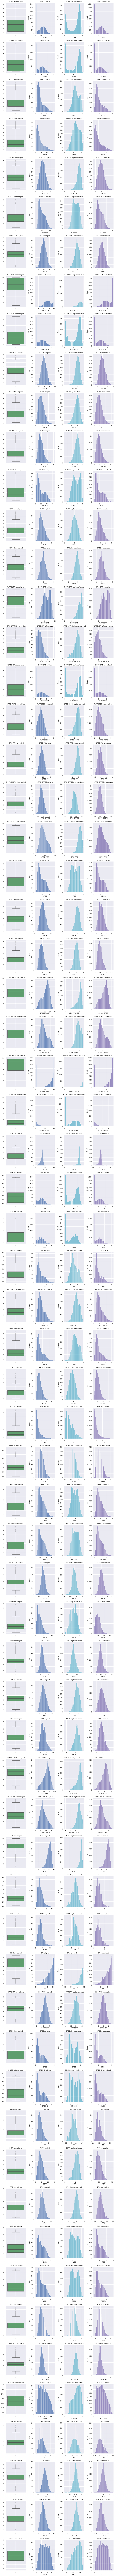

In [24]:
## transformations to compare against
df_log = df.apply(np.log1p)
norm_data = StandardScaler().fit_transform(df)
df_norm = pd.DataFrame(norm_data, index=df.index, columns=df.columns)

## plotting...
fig, axes = plt.subplots(nrows=66, ncols=4, figsize=(12,265))
dfs = [df, df, df_log, df_norm]
colors = ['g', 'b', 'c', 'm']
plots = ['box original', 'original', 'log transformed', 'normalized']

# [ax_left, ax_mid, ax_right]
for col, axe_row in zip(df.columns, axes):
    for dist, ax, color, plot in zip(dfs, axe_row, colors, plots):
        if plot == 'box original':
            sns.boxplot(data=dist[col], color=color, ax=ax)
            ax.set_title(f'{col}: {plot}')
        else:
            sns.histplot(data=dist[col], color=color, ax=ax)
            ax.set_title(f'{col}: {plot}')
        
        plt.tight_layout()

    

plt.savefig('stat_distributions.png', bbox_inches='tight') # useless figure

## Save each stat distribution as image (old)

In [35]:
# ## saving image for each stat

# # plt.style.use("dark_background")
# plt.style.use("default")
# sns.set()

# ## transformations to compare against
# df_log = df.apply(np.log1p)
# norm_data = StandardScaler().fit_transform(df)
# df_norm = pd.DataFrame(norm_data, index=df.index, columns=df.columns)


# ## plotting...
# dfs = [df, df, df_log, df_norm]
# colors = ['g', 'b', 'c', 'm']
# plots = ['box original','original', 'log transformed', 'normalized']

# img_dir = 'plots/each_stat_distribution/'

# for col in df.columns:
#     fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3.75))
#     for dist, ax, color, plot in zip(dfs, axes, colors, plots):
#         if plot == 'box original':
#             sns.boxplot(data=dist[col], color=color, ax=ax)
#             ax.set_title(f'{col}: {plot}')
#         else:
#             sns.histplot(data=dist[col], color=color, ax=ax)
#             ax.set_title(f'{col}: {plot}')        

#         plt.tight_layout()
            
#     ## format nice file names
#     if ' ' in col or '/' in col:
#         col = col.replace(' ', '_')
#         col = col.replace('/', '_')

#     plt.savefig(img_dir + f'{col}_distributions.png')#, bbox_inches='tight')#, pad_inches=0.5) #, pad_inches=3.0)
#     plt.close()
        


## ALL BOX AND HIST: VISUALIZE TO DECIDE TRANSFORMS

Wall time: 10min 6s


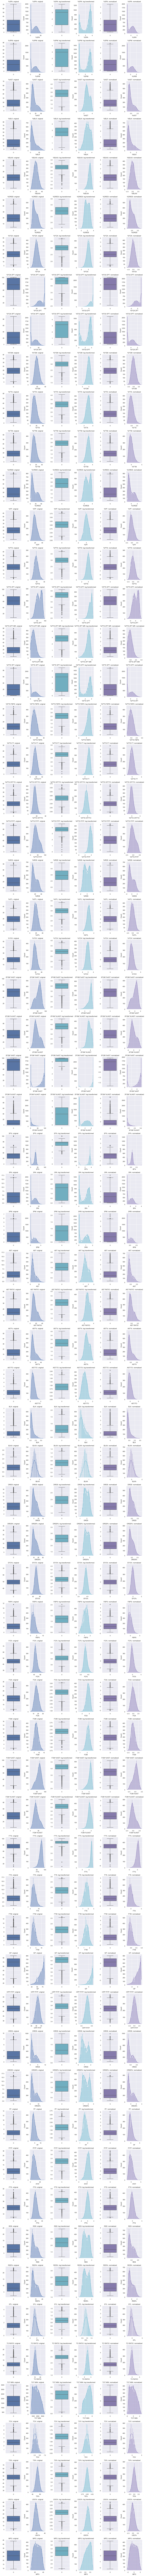

In [67]:
%%time
## transformations to compare against
df_log = df.apply(np.log1p)
norm_data = StandardScaler().fit_transform(df)
df_norm = pd.DataFrame(norm_data, index=df.index, columns=df.columns)

## plotting...
fig, axes = plt.subplots(nrows=66, ncols=6, figsize=(15,265)) #265
dfs = [df, df_log, df_norm]
colors = ['b', 'c', 'm']
plots = ['original', 'log transformed', 'normalized']

for col, axe_row in zip(df.columns, axes):
    for data, [ax_box, ax_hist], color, plot in zip(dfs, axe_row.reshape(3,-1), colors, plots):
        
        sns.boxplot(data=data[col], color=color, ax=ax_box)
        ax_box.set_title(f'{col}: {plot}')
        
        sns.histplot(data=data[col], color=color, kde=True, ax=ax_hist)
        ax_hist.set_title(f'{col}: {plot}')        
        
    plt.tight_layout()

plt.savefig('stat_distributions_box_hist.png', bbox_inches='tight') # useless figure

## Save images for all box and hist

In [60]:
## adding box plot for log transform

## saving image for each stat

# plt.style.use("dark_background")
plt.style.use("default")
sns.set()

## transformations to compare against
df_log = df.apply(np.log1p)
norm_data = StandardScaler().fit_transform(df)
df_norm = pd.DataFrame(norm_data, index=df.index, columns=df.columns)


## plotting...
dfs = [df, df_log, df_norm]
colors = ['b', 'c', 'm']
plots = ['original', 'log transformed', 'normalized']

img_dir = 'plots/each_stat_distribution/'

for col in df.columns[0:3]:
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 3.75))
    for data, color, plot, [ax_box, ax_hist] in zip(dfs, colors, plots, axes.reshape(3,-1)):
        sns.boxplot(data=data[col], color=color, ax=ax_box)
        ax_box.set_title(f'{col}: {plot}')
        
        sns.histplot(data=data[col], color=color, kde=True, ax=ax_hist)
        ax_hist.set_title(f'{col}: {plot}')        

        plt.tight_layout()
            
    ## format nice file names
    if ' ' in col or '/' in col:
        col = col.replace(' ', '_')
        col = col.replace('/', '_')

    plt.savefig(img_dir + f'{col}_distributions.png')#, bbox_inches='tight')#, pad_inches=0.5) #, pad_inches=3.0)
    plt.close()
        


## Save voilin plots for each stat

In [56]:
## saving image for each stat
# plt.style.use("dark_background")
plt.style.use("default")
sns.set()

## transformations to compare against
df_log = df.apply(np.log1p)
norm_data = StandardScaler().fit_transform(df)
df_norm = pd.DataFrame(norm_data, index=df.index, columns=df.columns)


## plotting...
dfs = [df, df_log, df_norm]
colors = ['b', 'c', 'm']
plots = ['original', 'log transformed', 'normalized']

img_dir = 'plots/transforms_violins/'

for col in df.columns:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3.75))
    for data, color, plot, ax in zip(dfs, colors, plots, axes):
        sns.violinplot(data=data[col], ax=ax, color=color)
        ax.set_title(f'{col}: {plot}')
        plt.tight_layout()
            
    ## format nice file names
    if ' ' in col or '/' in col:
        col = col.replace(' ', '_')
        col = col.replace('/', '_')

    plt.savefig(img_dir + f'{col}_violins.png')#, bbox_inches='tight')#, pad_inches=0.5) #, pad_inches=3.0)
    plt.close()
        


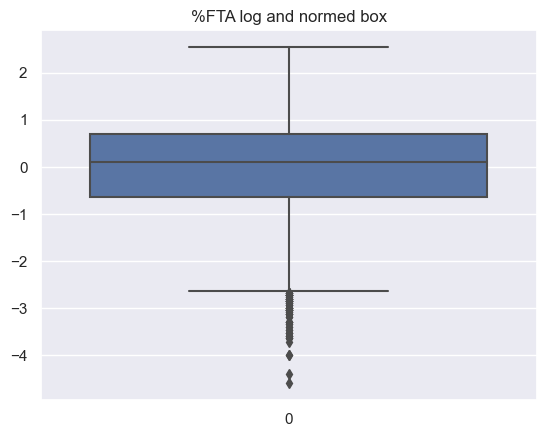

In [87]:
x = df.apply(np.log1p)
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, index=df.index, columns=df.columns)
col = '%3PM'
col = '%BLKA'
col = '%FTA'
# sns.histplot(data=x[col]);
# plt.title(col + ' log and normed');

sns.boxplot(data=x[col]);
plt.title(col + ' log and normed box');
